### Setup

In [1]:
import numpy as np

%run utils/utils_data_cleaning.py
%run utils/utils_maps.py

### Load a subset of the dataset

In [208]:
df = load_taxi_data_chunk(chunk=50000)
handle_missing_data(df)
df.head()

Data loaded with 50000 entries and 10 columns
Size reduction from 50000 to 48804 (1196 samples dropped for missing data)


,pu_t,do_t,trip_dist,pu_lon,pu_lat,do_lon,do_lat,duration,vec_dist,trip_ratio
0,2016-02-16 19:56:06,2016-02-16 20:10:46,8.53,-73.995750,40.764488,-73.926292,40.867458,880,7.983998,1.068387
1,2016-02-11 10:23:41,2016-02-11 10:45:04,1.95,-73.994110,40.751068,-73.993401,40.736019,1283,1.039087,1.876648
2,2016-02-21 14:21:57,2016-02-21 14:30:07,0.50,-73.973160,40.752728,-73.982178,40.756962,490,0.556130,0.899070
3,2016-02-11 22:51:59,2016-02-11 22:57:41,1.30,-73.991280,40.744808,-73.985909,40.731178,342,0.981839,1.324045
4,2016-02-13 18:32:08,2016-02-13 18:43:51,1.50,-73.992897,40.741280,-73.975967,40.748734,703,1.026608,1.461123


### Simple Plot

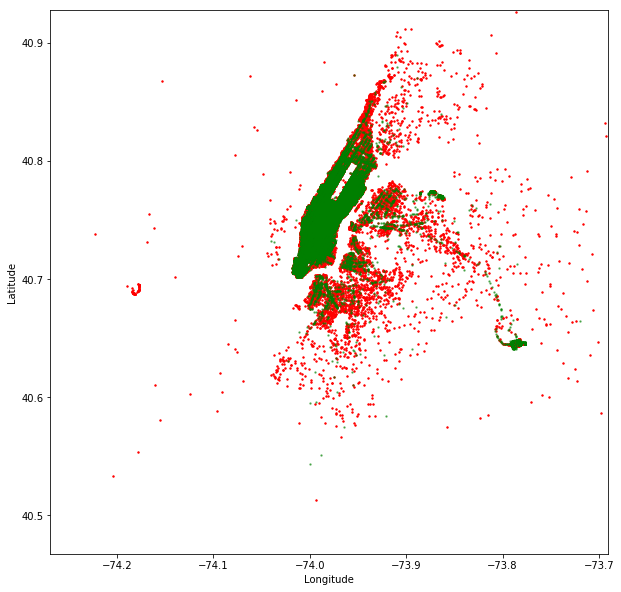

In [209]:
plot_coordinates(df, focus=False)

### Let's define a bounding box for NYC

Using this tool https://www.mapdevelopers.com/geocode_bounding_box.php, it is possible to retrieve the bounding coordinates for a given address. For NYC, we get the following:

North Latitude: 40.917577 
<br>South Latitude: 40.477399
<br>East Longitude: -73.700272
<br>West Longitude: -74.259090

In [210]:
lat_north, lat_south =  40.917577, 40.477399 
lon_east,   lon_west = -73.700272, -74.259090

### Coordinates histograms

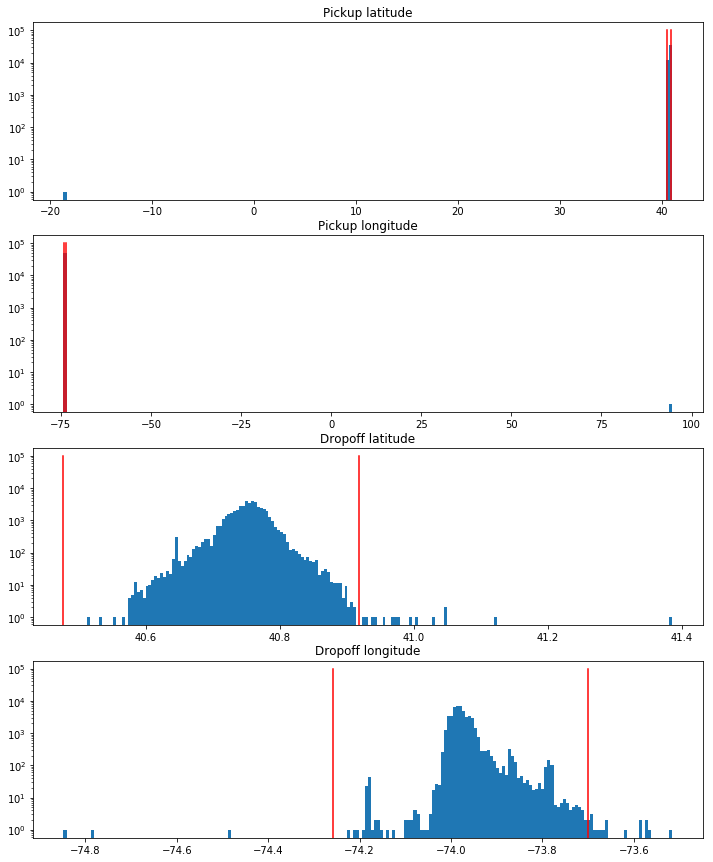

In [211]:
fig = plt.figure(figsize=(12,15))

titles = ['Pickup latitude', 'Pickup longitude', 'Dropoff latitude', 'Dropoff longitude']
coords = [df.pu_lat, df.pu_lon, df.do_lat, df.do_lon]

ax = [fig.add_subplot(4,1,i+1) for i in range(4)]
for i in range(4):
    ax[i].hist(coords[i], bins=200, log=True)
    ax[i].set_title(titles[i])

for i in [0,2]:
    ax[i].plot((lat_south, lat_south),(0,1e5), c='r')
    ax[i].plot((lat_north, lat_north),(0,1e5), c='r')

for i in [1,3]:
    ax[i].plot((lon_west, lon_west),(0,1e5), c='r')
    ax[i].plot((lon_east, lon_east),(0,1e5), c='r')

### Filter out data points lying outside the NYC boounding box 

These limitations should be established as a preprocessing step in utils_data_cleaning.py (**handle_spatial_outliers**)

In [212]:
handle_spatial_outliers(df)

Size reduction from 48804 to 48772 (32 samples dropped for having outside the region of interest)


### Let's replot everything

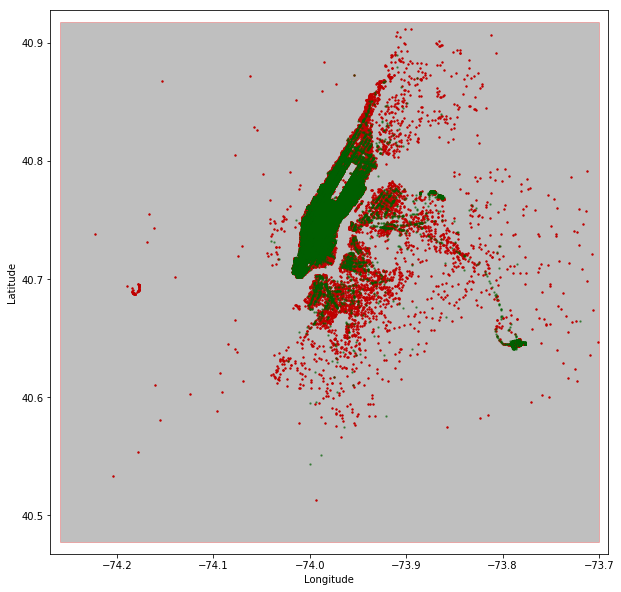

In [213]:
plot_coordinates(df, focus=False, bbox=True)

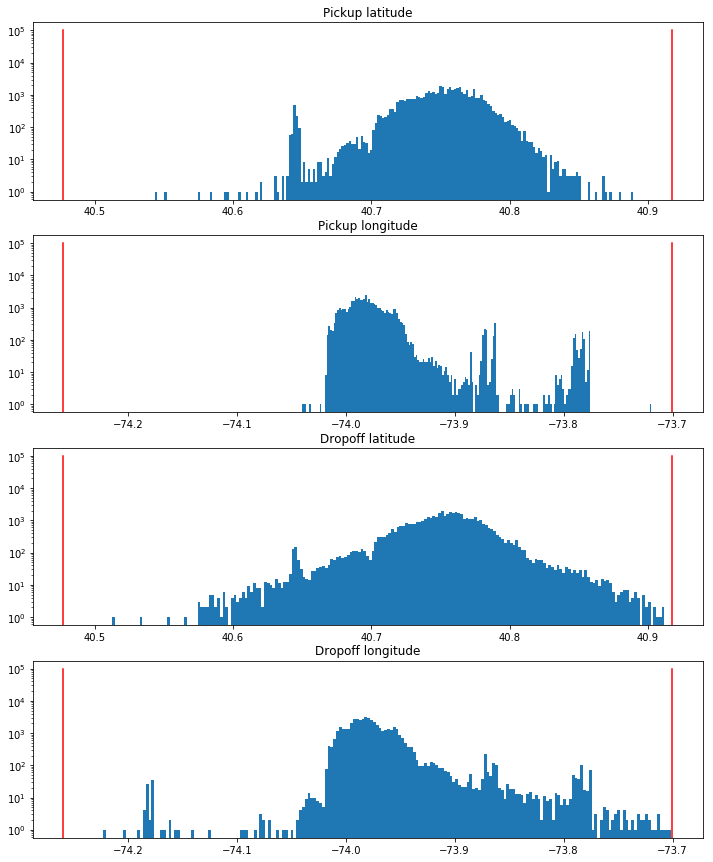

In [214]:
fig = plt.figure(figsize=(12,15))

titles = ['Pickup latitude', 'Pickup longitude', 'Dropoff latitude', 'Dropoff longitude']
coords = [df.pu_lat, df.pu_lon, df.do_lat, df.do_lon]

ax = [fig.add_subplot(4,1,i+1) for i in range(4)]
for i in range(4):
    ax[i].hist(coords[i], bins=200, log=True)
    ax[i].set_title(titles[i])

for i in [0,2]:
    ax[i].plot((lat_south, lat_south),(0,1e5), c='r')
    ax[i].plot((lat_north, lat_north),(0,1e5), c='r')

for i in [1,3]:
    ax[i].plot((lon_west, lon_west),(0,1e5), c='r')
    ax[i].plot((lon_east, lon_east),(0,1e5), c='r')

### Heatmap plots using Folium

In [215]:
pick_dat = df[['pu_lat','pu_lon']].values
drop_dat = df[['do_lat','do_lon']].values
both_dat = np.concatenate([pick_dat, drop_dat], axis=0)

d = [pick_dat, drop_dat, both_dat]
folium_map(d[2])

### Checking geospatial distance

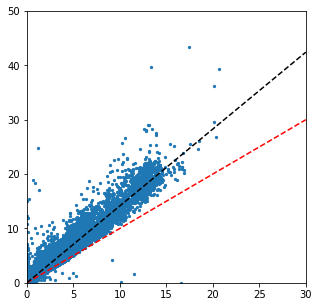

In [216]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df.vec_dist, df.trip_dist, s = 5)
plt.plot((0,30),(0,30), '--', c='r')
plt.plot((0,30),(0,np.sqrt(2)*30), '--', c='k')
plt.xlim((0,30))
plt.ylim((0,50))
plt.show()

In [217]:
str_stats = "\tmin = {0}\n\tmax = {1}\n\tmean = {2}\n\tmedian = {3}"

print('All samples:')
print(str_stats.format(df.trip_ratio.min(), df.trip_ratio.max(), df.trip_ratio.mean(), df.trip_ratio.median()))

All samples:
	min = 0.0030205220791940735
	max = 2292.453044880653
	mean = 1.9096203688960809
	median = 1.3104452861308011


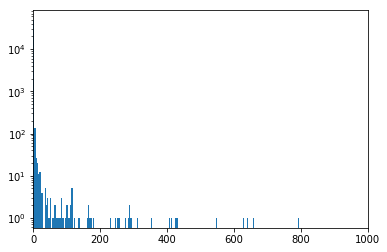

In [218]:
plt.hist(df.trip_ratio,bins=600, log=True)
plt.xlim(0,1000)
plt.show()

### Remove samples presenting very high ratio

In [219]:
handle_invalid_trips(df)

Size reduction from 48772 to 48686 (86 samples dropped for being invalid)


In [220]:
str_stats = "\tmin = {0}\n\tmax = {1}\n\tmean = {2}\n\tmedian = {3}"

print('All samples:')
print(str_stats.format(df.trip_ratio.min(), df.trip_ratio.max(), df.trip_ratio.mean(), df.trip_ratio.median()))

All samples:
	min = 0.0030205220791940735
	max = 24.958763482213083
	mean = 1.3759498521199753
	median = 1.3099911409925156


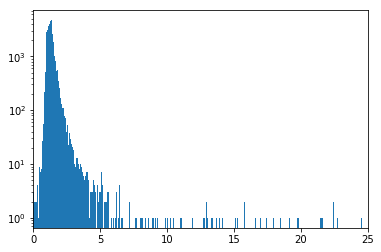

In [221]:
plt.hist(df.trip_ratio,bins=500, log=True)
plt.xlim(0,25)
plt.show()